<a href="https://colab.research.google.com/github/min03027/24-2-data-science-applications/blob/main/Chapter_03_practice_min1_0915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure DMBA package is available

# CH3-1.BostonHousing

##   1.데이터 분석 및 시각화 관련 라이브러리 소개
1. **os**
   - 운영 체제와 상호작용할 수 있는 모듈
   - 파일과 디렉터리 작업을 수행
   - 파일 경로를 조작하거나 환경 변수를 읽고 설정하는 데 사용

2. **calendar**
   - 달력 관련 작업을 처리하는 모듈
   - 월별 및 연도별 달력 생성
   - 특정 날짜의 요일 계산 등

3. **pathlib**
   - 파일 및 디렉토리 경로를 객체 지향적으로 처리
   - 파일 경로 조작 및 탐색
   - 경로 관련 작업을 수행

4. **numpy**
   - 수치 계산과 배열 처리를 위한 라이브러리
   - 다차원 배열 객체 `ndarray` 제공
   - 다양한 수학 함수와 배열 연산 수행

5. **networkx**
   - 복잡한 네트워크 및 그래프 데이터를 처리하고 분석
   - 그래프 생성, 분석, 시각화 등

6. **pandas**
   - 데이터 분석 및 조작을 위한 라이브러리
   - 데이터 프레임과 시리즈 객체 제공
   - 데이터 읽기/쓰기, 조작 및 분석 수행

7. **pandas.plotting**
   - 데이터 시각화를 위한 도구 제공
   - `scatter_matrix` (산점도 행렬) 및 `parallel_coordinates` (평행 좌표 평면) 등

8. **seaborn**
   - 통계적 데이터 시각화를 위한 라이브러리
   - 다양한 통계적 플롯과 시각화 기능 제공
   - `matplotlib`을 기반으로 세련된 시각화 지원

9. **sklearn.preprocessing**
   - 데이터 전처리를 위한 도구 제공
   - 데이터 스케일링, 정규화, 인코딩 등

10. **matplotlib.pylab**
    - 데이터 시각화를 위한 라이브러리
    - 플롯 생성 및 그래프와 차트 그리기
    - 일반적으로 `matplotlib.pyplot` 사용

11. **%matplotlib inline**
    - Jupyter 노트북에서 matplotlib 플롯을 인라인으로 표시
    - 플롯이 노트북 내에서 바로 표시되도록 설정

In [ ]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


%matplotlib inline


In [ ]:
print(os.getcwd())

/content


## 2.데이터 불러오기
- 파일 업로드
- 파일 읽기
- 상위 5행 출력

In [ ]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
# 파일 읽기 & 상위 5행 출력
housing_df = pd.read_csv('BostonHousing.csv')
housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [ ]:
# CAT.MEDV 열이름을 더 쉽게 다루기 위해 이름 변경
# rename {원이름 : 변경명칭}
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
# print(housing_df.head(9)) # 콘솔출력
housing_df.head(9) # 자동 렌더링

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0



## 3.저소득층의 비율과 주택가격 중앙 값 간의 산점도 그리기
- x='LSTAT': X축에는 LSTAT 열의 값을 사용
- y='MEDV': Y축에는 MEDV 열의 값을 사용
- legend=False: 범례를 표시하지 않는다. 즉, 산점도에 범례를 표시하지 않는다.

### Q1. 산점도를 그리는 이유는?
: 두 변수간의 관계를 시각적으로 파악 할 수 있다

### Q2. 산점도의 결과는?
: 저소득층 비율이 낮을 수록 주택가격의 중앙값이 높다.


저소득층 비율이 높을 수록 주택 가격이 낮다




### Q3. 결과의 의미는?
: 우하향 하는 그래프로 나타나기 때문에 두 변수간의 관계는 음의 관계이다.

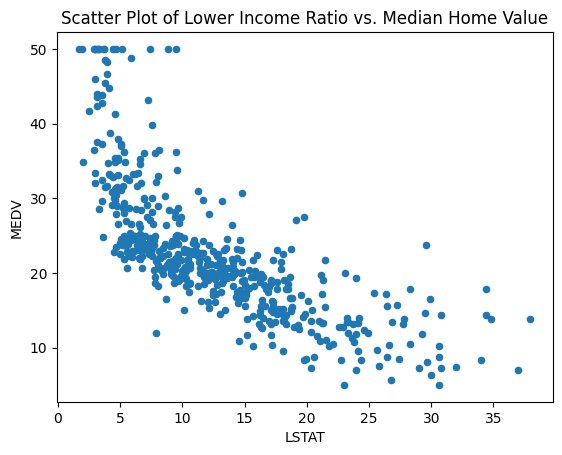

In [ ]:
# 저소득층의 비율과 주택가격 중앙 값 간의 산점도 그리기
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False) # legend = False : 범례를 표시 하지 않도록 함
plt.title('Scatter Plot of Lower Income Ratio vs. Median Home Value')
plt.show()


## 4.저소득층의 비율과 범죄율 간의 산점도 그리기
- x='LSTAT': X축에는 LSTAT 열의 값을 사용
- y='CRIM': Y축에는 CRIM 열의 값을 사용
- legend=False: 범례를 표시하지 않는다. 즉, 산점도에 범례를 표시하지 않는다.

### Q2. 산점도의 결과는?
: 저소득층 비율이 낮을 수록 범죄율이 높게 나타난다.

### Q3. 결과의 의미는?
: 우상향 하는 그래프로 나타나기 때문에 두 변수간의 관계는 양의 관계이다.

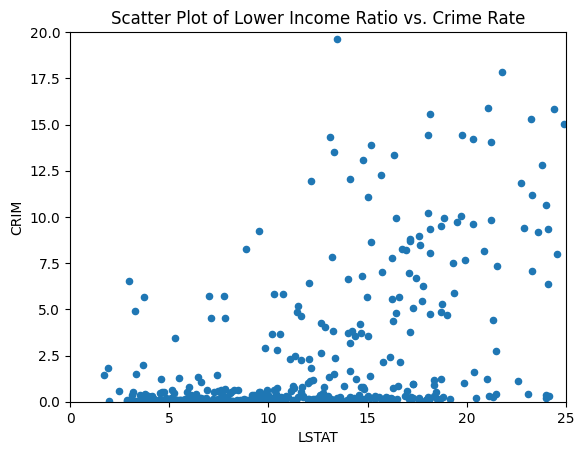

In [ ]:
# 저소득층의 비율과 범죄율 간의 산점도 그리기
housing_df.plot.scatter(x='LSTAT', y='CRIM', legend=False) # legend = False : 범례를 표시 하지 않도록 함
plt.title('Scatter Plot of Lower Income Ratio vs. Crime Rate')

# y축 범위 설정 (최댓값 : 20)
plt.ylim(0, 20)
plt.xlim(0, 25)
plt.show()

## 4-1. 산점도에서 점의 색상과 모양 변경
> 서브플롯 사용시 하나의  큰 그림안에 여러개의 작은 그래프를 배열 형태로 표시 가능
- 서브플롯을 생성하여 새로운 피규어(fig)와 축(ax)을 생성
- fig는 전체 그림을 나타내고, ax는 개별 플롯을 그릴 축

- housing_df.LSTAT과 housing_df.MEDV를 X축과 Y축의 데이터로 사용
- edgecolor로 테두리색 설정
- facecolor로 각 점의 내부 색 설정
- plt.tight_layout() : 플롯의 레이아웃을 자동으로 조정하여 레이블과 다른 요소들이 겹치지 않도록 합니다.


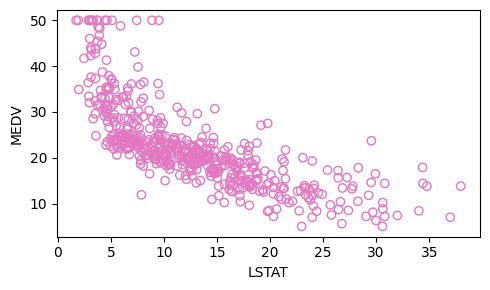

In [ ]:

fig, ax = plt.subplots() # 서브플롯 생성
fig.set_size_inches(5, 3) # 그림의 크기를 인치 단위로 설정

# 산점도 그리기
ax.scatter(housing_df.LSTAT, housing_df.MEDV, edgecolor='C6', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout() # 자동으로 플롯의 레이아웃 조정
plt.show()

## 5.찰스강 인접도(CHAS)를 기준으로 MEDV 평균값을 막대그래프로 나타내기
- 모든 숫자형 열(CRIM, ZN, INDUS, AGE, MEDV)에 대한 평균값을 CHAS으로 그룹화 하여 테이블로 시각화



- MEDV 열의 평균을 CHAS으로 그룹화 하여 막대그래프로 시각화
  - ax는 생성된 막대 그래프의 축을 반환
  - Y축의 레이블을 "Avg. MEDV"로 설정한다. 이는 각 CHAS 값에 대한 평균 주택 가격 중앙 값을 나타냄
  - 플롯의 레이아웃을 자동으로 조정

In [ ]:
# housing_df를 groupby()을 통해 'CHAS'열을 기준으로 그룹화
# CHAS 값이 0인 그룹과 1인 그룹 각각의 모든 숫자형 열(CRIM, ZN, INDUS, AGE, MEDV)에 대한 평균값을 보여줌
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


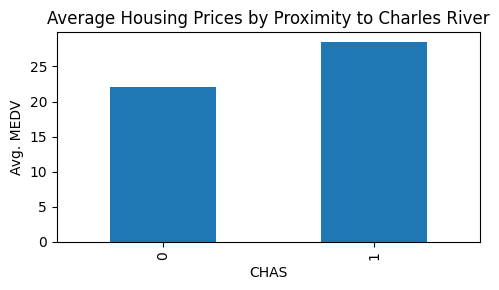

In [ ]:
# 'CHAS' 열을 기준으로 그룹화하여 'MEDV' 열의 평균을 계산하고 막대 그래프로 그리기
ax = housing_df.groupby('CHAS').mean()['MEDV'].plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')
ax.set_title('Average Housing Prices by Proximity to Charles River')
plt.tight_layout()
plt.show()

In [ ]:
#dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
#ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
#ax.set_ylabel('% of CAT.MEDV')

#plt.tight_layout()
#plt.show()

### 5-1.막대그래프에서 그래프의 색상 변경
- dataForPlot.index : x축의 위치를 지정하는 값
  - CHAS열의 고유 값(0또는1)을 나타낸다.
- dataForPlot : y축의 값 (CHAS 값에 대한 MEDV)
  

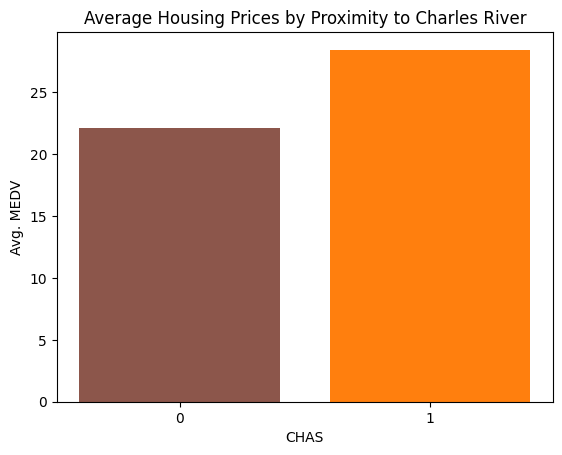

In [ ]:
# 찰스강에 인접도와 주택 가격 간의 막대그래프 색상 변경
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])# x축에 0과 1의 눈금 설정
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')
ax.set_title('Average Housing Prices by Proximity to Charles River')
plt.show()

# CH3-2.Amtrak
: 시간의 변화에 따른 승차 수 변화
- 시계열 데이터
  - 시간의 흐름에 따른 수량의 변화
  - 월별 수량의 차이 또는 변화
  - 연도별 수량의 변화

In [ ]:
# 데이터 업로드

uploaded = files.upload()

Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df.head(5)

Saving Amtrak.csv to Amtrak.csv


,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


## 1.시계열 데이터 변환과 시리즈 객체 생성
: 날짜 인덱스와 승객수 데이터 활용

> 시계열 데이터
  1. 시계열 데이터란?
- 시계열 데이터는 시간이 주요 축이 되어 그에 따라 측정된 값을 기록한 데이터.
- ex) 월별 승객 수, 일일 기온, 연간 매출 등
  2. 플로팅 시계열 데이터란?
- 시계열 데이터를 플로팅하는 것은 시간(보통 x축)과 값(보통 y축) 사이의 관계를 시각적으로 표현하는 것.



---


- 'Month' 열을 날짜 형식(%d/%m/%Y)으로 변환하여 Date열에 저장
- ridership_ts
  - 시계열 데이터로의 변환
    : 'Ridership' 값을 datetime 형식으로 변환하여 시계열 인덱스를 생성.
  - 시리즈 형태로 변환
  : 변환된 날짜 정보를 인덱스로 사용하고, 해당 날짜에 대한 값을 데이터로 가지는 pandas.Series 객체를 생성

- Data열을 인덱스로 사용
- 승객수의 데이터를 시계열 데이터로 표현



In [ ]:
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)
print(Amtrak_df.head(5))

        Month  Ridership       Date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01


## 2.시간에 따른 승객수 변화의 선그래프 : 시계열 데이터


- 시계열 데이터 플로팅
  - **ridership_ts.plot()**: ridership_ts 시계열 데이터를 플로팅한다.
  - **ylim=[1300, 2300]**: y축의 범위를 1300에서 2300으로 제한하여, 승객 수가 이 범위 내에서만 표시된다.
  - **legend=False**: 범례를 표시하지 않는다
  -**figsize=[5, 3]**: 플롯의 크기를 가로 5인치, 세로 3인치로 설정
- 축레이블 추가
- 레이아웃 조정 및 표시


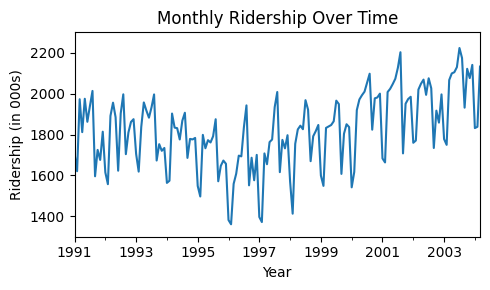

In [ ]:
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.title('Monthly Ridership Over Time')
plt.tight_layout()
plt.show()

## 3.2000년대의 월별 승객수 변화의 선그래프 : 시계열 데이터
- 2000년 데이터 추출
  - **ridership_ts['2000']**: ridership_ts 시리즈에서 2000년의 모든 데이터 포인트를 추출하여 **ridership_2000** 생성
- 월별 승객수 집계
  - **resample('M')**: 월별로 데이터를 재샘플링한다. 'M'은 월별로 데이터를 그룹화하는 것을 의미
  - **sum()**: 각 월에 대해 승객 수를 합산. 월별 총 승객 수를 계산
- 플로팅
  - **monthly_ridership_2000.plot()**: 월별 승객 수를 플로팅한다
  - **ylim=[1300, 2300]**: y축 범위를 1300에서 2300으로 설정하여 승객 수의 범위를 조정한다
  - **legend=False**: 범례를 표시하지 않는다.

- 축레이블과 타이틀 설정
- 플롯 표시

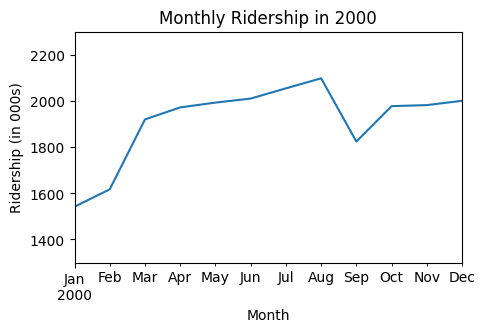

In [ ]:
ridership_2000 = ridership_ts['2000']
monthly_ridership_2000 = ridership_2000.resample('M').sum()

monthly_ridership_2000.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])

plt.xlabel('Month')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.title('Monthly Ridership in 2000')
plt.show()

## 4.1995-2000년대의 월별 승객수 변화의 선그래프 : 시계열 데이터

- 1995-2000년 데이터 추출
  - **ridership_ts['1995':'2000']**: ridership_ts 시리즈에서 1995년부터 2000년까지의 모든 데이터 포인트를 추출하여 ridership_95_00 생성
월별 승객수 집계
  - **resample('M')**: 월별로 데이터를 재샘플링한다. 'M'은 월별로 데이터를 그룹화하는 것을 의미
  - **sum()**: 각 월에 대해 승객 수를 합산. 월별 총 승객 수를 계산

- 플로팅
  - **monthly_ridership_95_00.plot()**: 월별 승객 수를 플로팅한다
  - **ylim=[1300, 2300]**: y축 범위를 1300에서 2300으로 설정하여 승객 수의 범위를 조정한다
  - **legend=False**: 범례를 표시하지 않는다
  - **figsize=[5, 3]**: 플롯의 크기를 가로 5인치, 세로 3인치로 설정한다

- 축 레이블과 타이틀 설정
  - **plt.xlabel('Month')**: x축 레이블을 'Month'로 설정한다
  - **plt.ylabel('Ridership (in 000s)')**: y축 레이블을 'Ridership (in 000s)'로 설정한다

- 플롯 표시

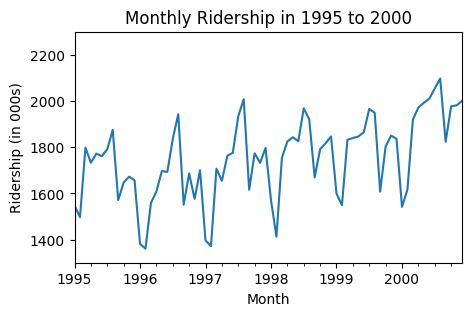

In [ ]:
ridership_95_00 = ridership_ts['1995':'2000']
monthly_ridership_95_00 = ridership_95_00.resample('M').sum()

monthly_ridership_95_00.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])

plt.xlabel('Month')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.title('Monthly Ridership in 1995 to 2000')
plt.show()



---



# 차원축소
- 차원의 증가와 노이즈

## Figure 3.2


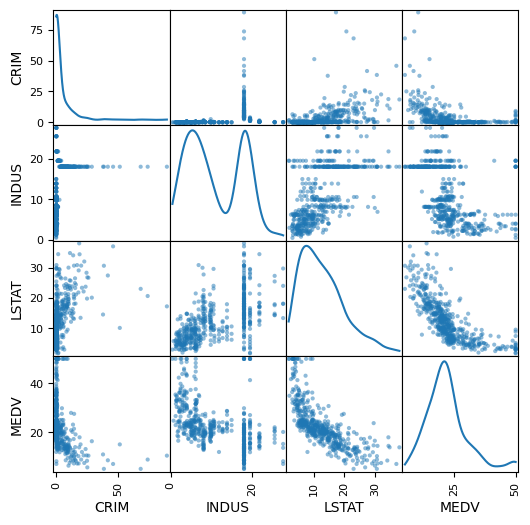

In [ ]:
_ = scatter_matrix(housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']], figsize=(6, 6), diagonal='kde')

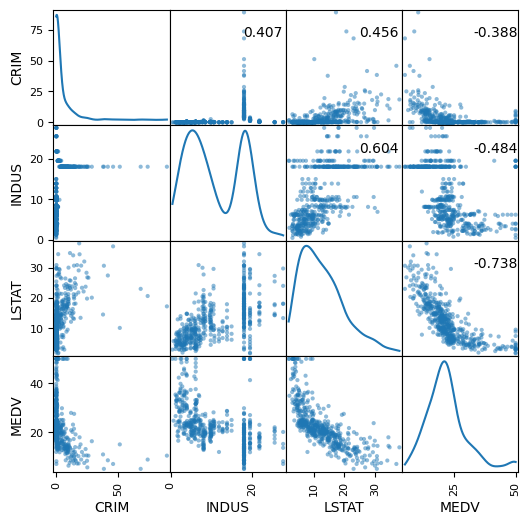

In [ ]:
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## Figure 3.8

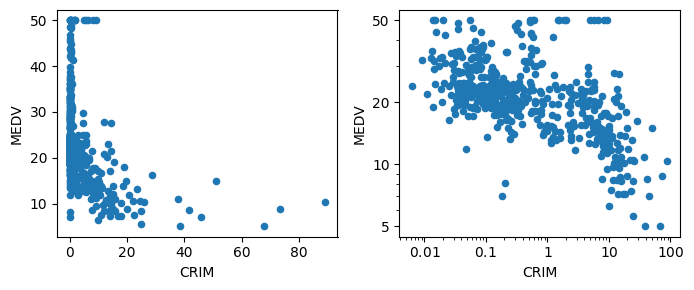

In [ ]:
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))


housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])


ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

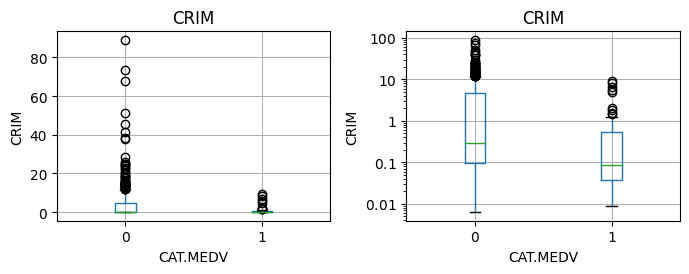

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

## Figure 3.9

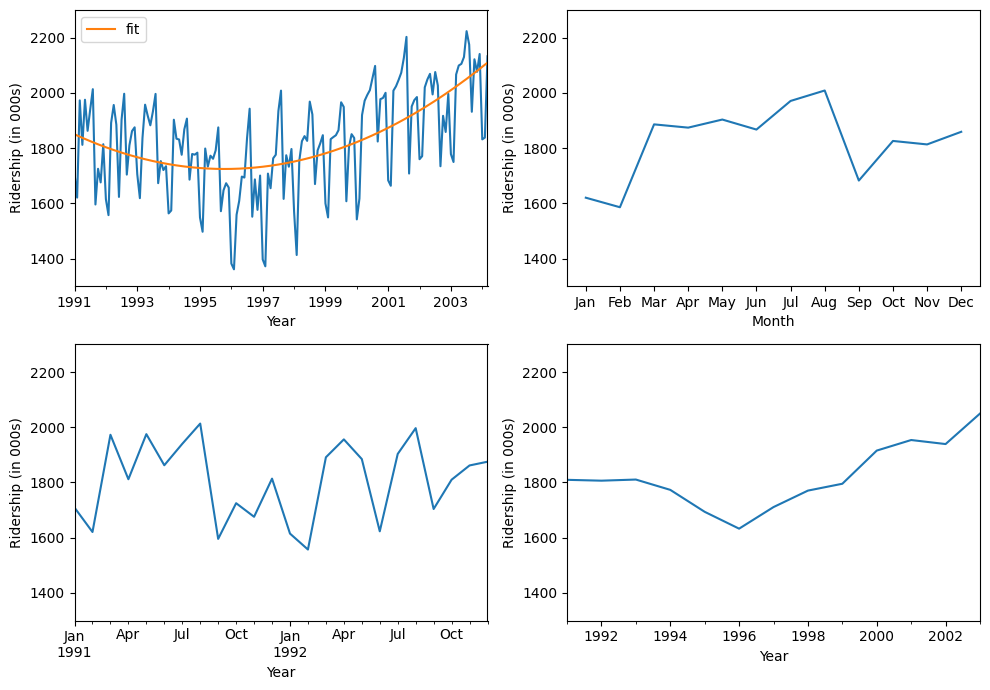

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))


Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()

plt.show()

## Figure 3.10

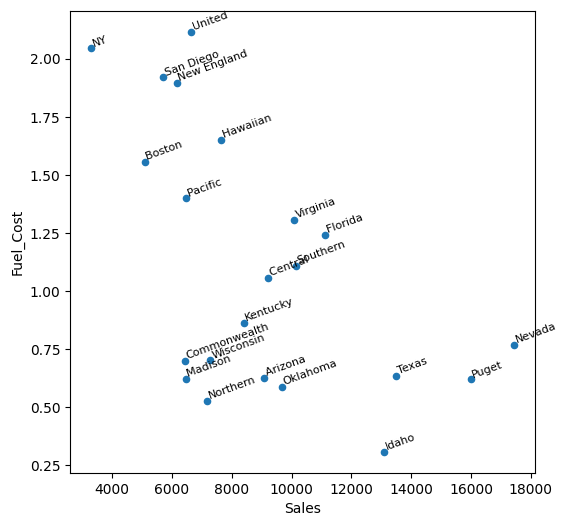

In [ ]:
utilities_df = dmba.load_data('Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x:
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

## Figure 3.11


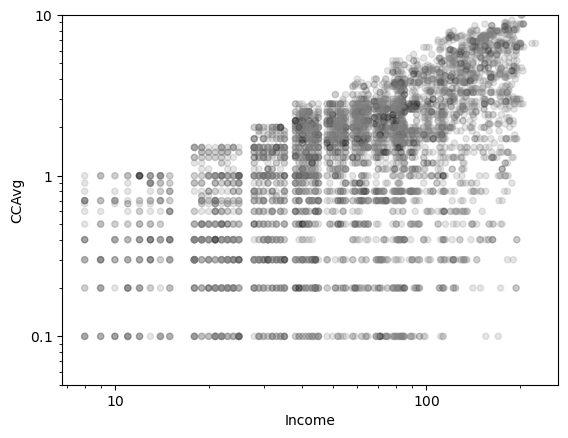

In [ ]:
universal_df = dmba.load_data('UniversalBank.csv')

universal_df.plot.scatter(x='Income', y='CCAvg',
                          c=['black' if c == 1 else 'grey' for c in universal_df['Securities Account']],
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)
plt.show()

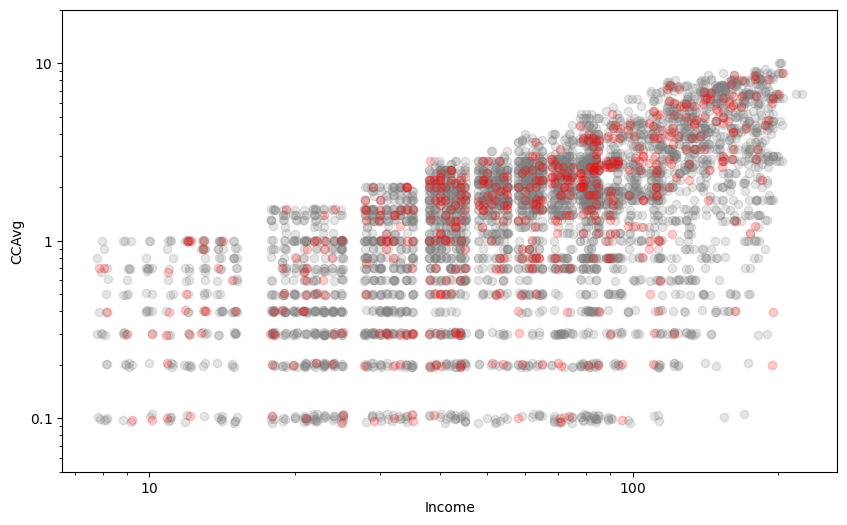

In [ ]:
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.uniform(-a, a, len(x))


saIdx = universal_df[universal_df['Securities Account'] == 1].index

plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg),
            marker='o', color='grey', alpha=0.2)
plt.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg),
            marker='o', color='red', alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")

plt.show()

## Figure 3.12

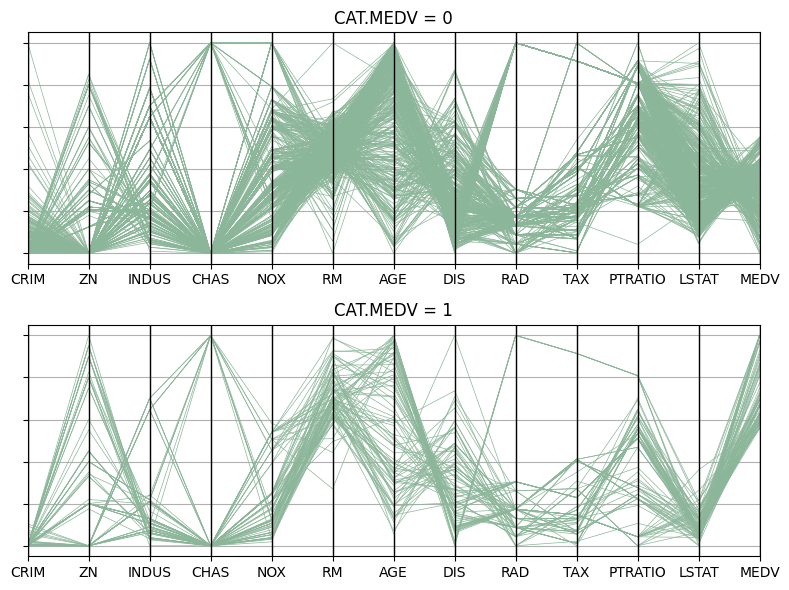

In [ ]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i],
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()  # Increase the separation between the plots

plt.show()

## Figure 3.14

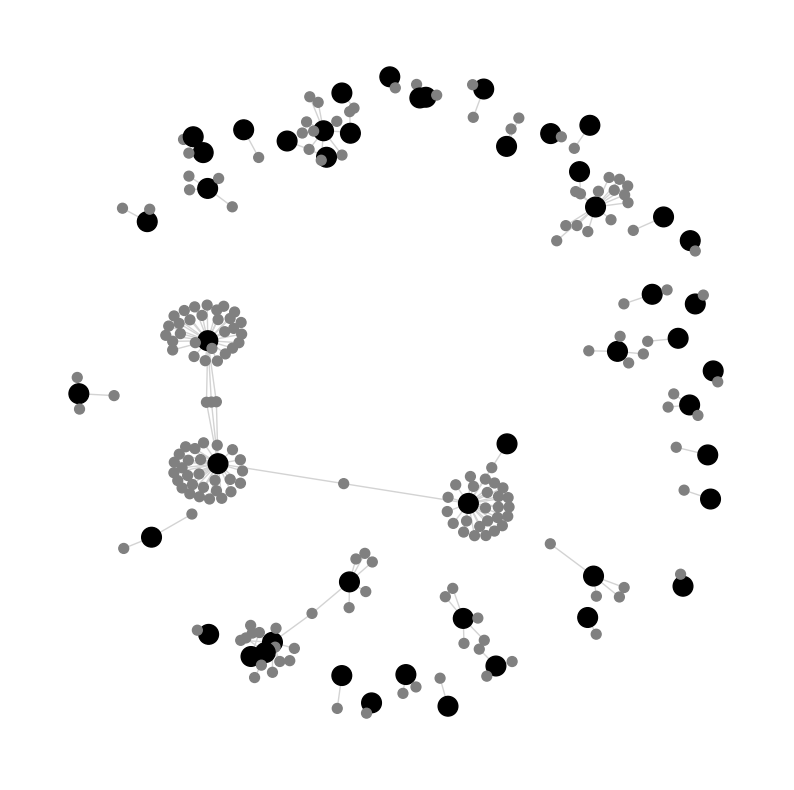

In [ ]:
ebay_df = dmba.load_data('eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')

plt.show()

## Figure 3.15
There are currently no packages in Python that provide treemaps of the same quality and flexibility as R.

Use example from here: https://python-graph-gallery.com/treemap/

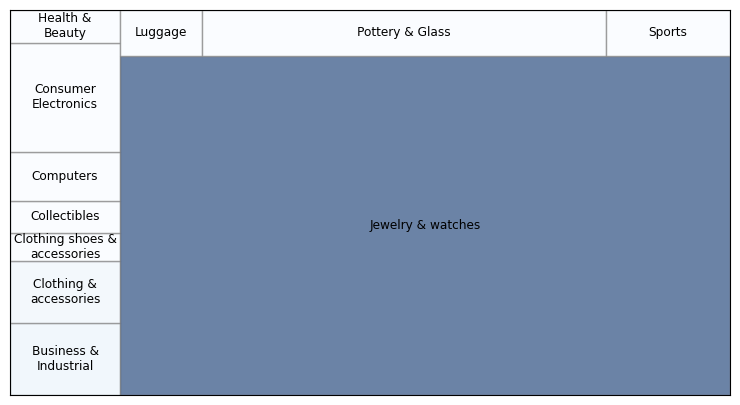

In [ ]:
import squarify
import matplotlib

ebayTreemap = dmba.load_data('EbayTreemap.csv')

grouped = []
for category, df in ebayTreemap.groupby('Category'):
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)

norm = matplotlib.colors.Normalize(vmin=byCategory.negativeFeedback.min(), vmax=byCategory.negativeFeedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]

fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

renameCategories = {
    'Business & Industrial': 'Business &\nIndustrial',
    'Health & Beauty': 'Health &\nBeauty',
    'Consumer Electronics': 'Consumer\nElectronics',
    'Clothing & accessories': 'Clothing &\naccessories',
    'Clothing shoes & accessories': 'Clothing shoes &\naccessories'
}
labels = [renameCategories.get(c, c) for c in byCategory.category]

squarify.plot(label=labels, sizes=byCategory.averageBid, color=colors,
              ax=ax, alpha=0.6, edgecolor='grey', text_kwargs={'fontsize': 8.7})

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.subplots_adjust(left=0.1)
plt.show()
# labels

## Figure 3.16
To run this example you need an API key for Google maps. Go to https://cloud.google.com/maps-platform/ to find out how to get one.

In [ ]:
if 'GMAPS_API_KEY' in os.environ:
    import gmaps
    SCstudents = dmba.load_data('SC-US-students-GPS-data-2016.csv')

    gmaps.configure(api_key=os.environ['GMAPS_API_KEY'])
    fig = gmaps.figure(center=(39.7, -105), zoom_level=3)
    fig.add_layer(gmaps.symbol_layer(SCstudents, scale=2,
                                     fill_color='red', stroke_color='red'))
    fig

## Figure 3.17
<div class="alert alert-info">If you get an error message on MacOS about a missing library, set the environment variable `DYLD_FALLBACK_LIBRARY_PATH` before starting jupyter notebook.
<br>
```
export DYLD_FALLBACK_LIBRARY_PATH=/usr/local/lib:/lib:/usr/lib
```
</div>

In [ ]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline


In [ ]:
import warnings
from cartopy.io import DownloadWarning

# warnings.filterwarnings('ignore', category=DownloadWarning)

/usr/local/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


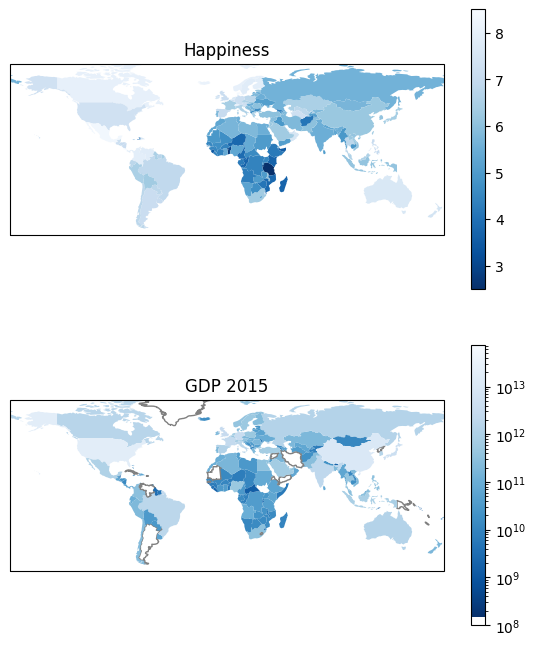

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

gdp_df = dmba.load_data('gdp.csv', skiprows=4)
gdp_df = gdp_df.rename(columns={'2015': 'GDP2015'})
gdp_df = gdp_df.set_index('Country Code')  # use the three letter country code to access rows

# The file contains a column with two letter combinations, use na_filter to avoid converting
# the combination NA into not-a-number
happiness_df = dmba.load_data('Veerhoven.csv', na_filter = False)
happiness_df = happiness_df.set_index('Code')  # use the country name to access rows


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax1.set_extent([-150, 60, -25, 60])
ax2.set_extent([-150, 60, -25, 60])

# Create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin=happiness_df.Score.dropna().min(),
                                    vmax=happiness_df.Score.dropna().max())
norm2 = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(),
                                  vmax=gdp_df.GDP2015.dropna().max())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    countryCode = country.attributes['ADM0_A3']
    if countryCode in gdp_df.index:
        if pd.isna(gdp_df.loc[countryCode].GDP2015):
            ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                                edgecolor='grey', facecolor='white')
        else:
            ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                                facecolor=cmap(norm2(gdp_df.loc[countryCode].GDP2015)))
    # check various attributes to find the matching two-letter combinations
    nation = country.attributes['POSTAL']
    if nation not in happiness_df.index:
        nation = country.attributes['ISO_A2']
    if nation not in happiness_df.index:
        nation = country.attributes['WB_A2']
    if nation not in happiness_df.index and country.attributes['NAME'] == 'Norway':
        nation = 'NO'
    if nation in happiness_df.index:
        ax1.add_geometries([country.geometry], ccrs.PlateCarree(),
                           facecolor=cmap(norm1(happiness_df.loc[nation].Score)))

ax2.set_title("GDP 2015")
sm = plt.cm.ScalarMappable(norm=norm2, cmap=cmap)
cb = plt.colorbar(sm, ax=ax2)
cb.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13])

ax1.set_title("Happiness")
sm = plt.cm.ScalarMappable(norm=norm1, cmap=cmap)
cb = plt.colorbar(sm, ax=ax1)
cb.set_ticks([3, 4, 5, 6, 7, 8])


plt.show()

In [ ]:
gdp_df

,Country Name,Indicator Name,Indicator Code,GDP2015
Country Code,,,,
ABW,Aruba,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
AND,Andorra,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
AFG,Afghanistan,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.919944e+10
AGO,Angola,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.026430e+11
ALB,Albania,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.145560e+10
...,...,...,...,...
YEM,"Yemen, Rep.",GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
ZAF,South Africa,GDP at market prices (current US$),NY.GDP.MKTP.CD,3.127980e+11
COD,"Congo, Dem. Rep.",GDP at market prices (current US$),NY.GDP.MKTP.CD,3.523774e+10
